In [19]:
import tensorflow as tf

In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/home/tazmeen/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.1497697 ,  0.09890429,  0.2848585 , -0.5189288 , -0.08058032,
         0.4443261 , -0.11607026,  0.04072166, -0.52099794,  0.65463173]],
      dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[0.10443287, 0.09925369, 0.11953788, 0.05350879, 0.08294639,
        0.14020433, 0.08005425, 0.09364364, 0.05339819, 0.17301989]],
      dtype=float32)

In [24]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
loss_fn(y_train[:1], predictions).numpy()

1.9646544

In [26]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8518 - loss: 0.5051
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8518 - loss: 0.5051
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9538 - loss: 0.1575
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9538 - loss: 0.1575
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9644 - loss: 0.1133
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9644 - loss: 0.1133
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9739 - loss: 0.0875
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9739 - loss: 0.0875
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0770
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0770


In [28]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 2s - 7ms/step - accuracy: 0.9766 - loss: 0.0755


[0.07549556344747543, 0.9765999913215637]

In [29]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [30]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.85932691e-08, 1.16627170e-07, 2.88636301e-07, 8.57888972e-06,
        4.62861451e-11, 4.16771613e-08, 2.06778005e-14, 9.99990821e-01,
        3.32358407e-09, 1.16050565e-07],
       [2.04559313e-07, 1.09384433e-04, 9.99886274e-01, 3.91965841e-06,
        2.29606559e-14, 1.74377831e-07, 3.18071014e-09, 1.37095967e-14,
        1.49848034e-07, 2.38530143e-13],
       [1.62699948e-07, 9.99624252e-01, 2.86722880e-05, 2.89836225e-06,
        1.77430265e-05, 8.43133648e-07, 9.48350419e-07, 2.66693329e-04,
        5.74275182e-05, 3.63030381e-07],
       [9.99989152e-01, 3.34079917e-11, 5.61002616e-06, 7.06121313e-08,
        2.21570429e-09, 1.17512275e-06, 3.75949810e-07, 7.38911865e-07,
        3.51589313e-09, 2.89670061e-06],
       [2.55332611e-06, 3.45320023e-10, 2.41537123e-06, 1.47564343e-08,
        9.97138381e-01, 1.48801519e-07, 7.78912067e-07, 1.84547665e-04,
        3.18429557e-07, 2.67087598e-03]], dtype=float32)>

In [31]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [32]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0

print("Original shapes:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")


x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, 
    test_size=0.5,        
    random_state=42,      
    stratify=y_test      
)

print(f"x_val: {x_val.shape}, y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")



# Reshape for CNN 
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


print(f"x_train: {x_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"x_test: {x_test.shape}")

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))  

model2.summary()

Original shapes:
x_train: (60000, 28, 28), y_train: (60000,)
x_test: (10000, 28, 28), y_test: (10000,)
x_val: (5000, 28, 28), y_val: (5000,)
x_test: (5000, 28, 28), y_test: (5000,)
x_train: (60000, 28, 28, 1)
x_val: (5000, 28, 28, 1)
x_test: (5000, 28, 28, 1)


/home/tazmeen/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train, 
                     epochs=5, 
                     validation_data=(x_val, y_val),
                     batch_size=32,
                     verbose=2)

Epoch 1/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9572 - loss: 0.1388 - val_accuracy: 0.9850 - val_loss: 0.0507
Epoch 2/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9572 - loss: 0.1388 - val_accuracy: 0.9850 - val_loss: 0.0507
Epoch 2/5
1875/1875 - 12s - 7ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.9838 - val_loss: 0.0498
Epoch 3/5
1875/1875 - 12s - 7ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.9838 - val_loss: 0.0498
Epoch 3/5
1875/1875 - 12s - 7ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9876 - val_loss: 0.0333
Epoch 4/5
1875/1875 - 12s - 7ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9876 - val_loss: 0.0333
Epoch 4/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9884 - val_loss: 0.0351
Epoch 5/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9923 - loss: 0.0240 - val_accuracy: 0.9884 - val_loss: 0.0351
Epoch 5/5
1875/1875 - 12s - 6ms/step - accuracy: 0.9941 - loss: 0.0182 - val_accuracy: 0.9916 - 

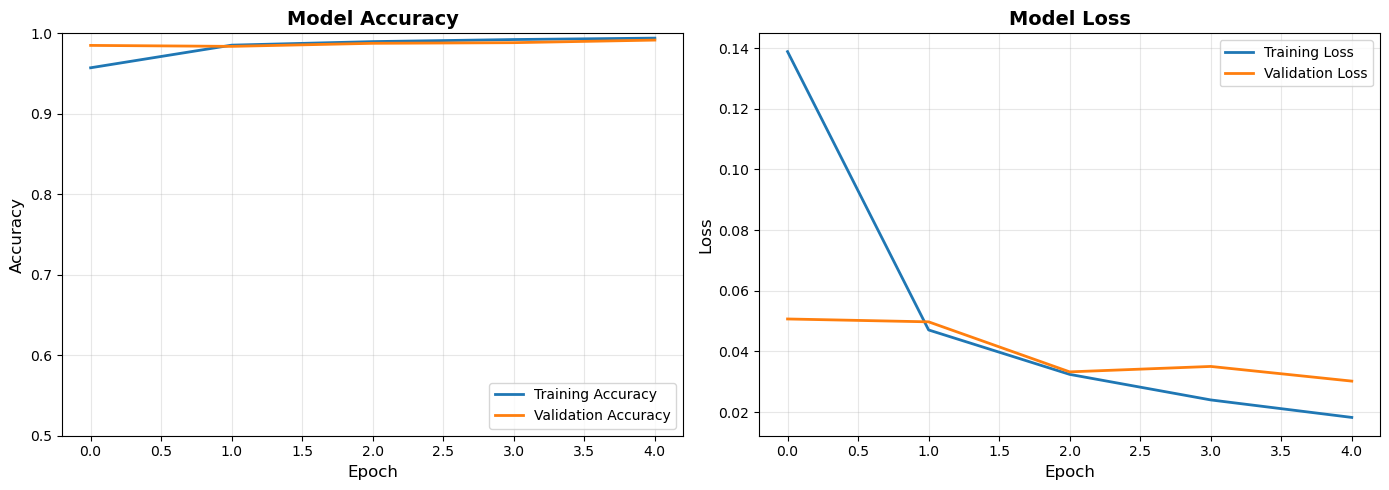

157/157 - 1s - 5ms/step - accuracy: 0.9908 - loss: 0.0269

Test Accuracy: 0.9908 (99.08%)
Test Loss: 0.0269

Test Accuracy: 0.9908 (99.08%)
Test Loss: 0.0269


In [34]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))


ax1.plot(history2.history['accuracy'], label='Training Accuracy', linewidth=2)
ax1.plot(history2.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_ylim([0.5, 1])
ax1.legend(loc='lower right', fontsize=10)
ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)


ax2.plot(history2.history['loss'], label='Training Loss', linewidth=2)
ax2.plot(history2.history['val_loss'], label='Validation Loss', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(loc='upper right', fontsize=10)
ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)')
print(f'Test Loss: {test_loss:.4f}')
